# QUESTIONS TO SUBJECT CLASSIFICATION

### Link to the Dataset: [Questions Data](https://www.kaggle.com/mrutyunjaybiswal/iitjee-neet-aims-students-questions-data)

### Importing Libraries

In [1]:
import pandas as pd
from sklearn import preprocessing
import nltk 
nltk.download('stopwords')                 # download the stopwords from NLTK

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt            # library for visualization
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Getting our Data

In [2]:
df = pd.read_csv(r'subjects-questions.csv')
df

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics
...,...,...
122514,Which of the following group of\ncharacters is...,Biology
122515,Light year is the\nA. light emitted by the sun...,Physics
122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology
122517,"In one average-life,\nA. half the active nucle...",Physics


### Data Preprocessing

In [3]:
df.isnull().any()  # checking for null values if any

eng        False
Subject    False
dtype: bool

In [4]:
label_encoder = preprocessing.LabelEncoder()  # label encoding for 'Label' column
df['Subject'] = label_encoder.fit_transform(df['Subject'])   # label encoding column - MSZoning for an example 
df

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,0
1,"Among the following organic acids, the acid pr...",1
2,If the area of two similar triangles are equal...,2
3,"In recent year, there has been a growing\nconc...",0
4,Which of the following statement\nregarding tr...,3
...,...,...
122514,Which of the following group of\ncharacters is...,0
122515,Light year is the\nA. light emitted by the sun...,3
122516,Member of Dipnoi are native of\nA. India.\nB. ...,0
122517,"In one average-life,\nA. half the active nucle...",3


### Performing steps in NLP

In [5]:
def process_q(q):
    """Process question function.
    Input:
        q: a string containing the question
    Output:
        q_clean: a list of words containing the processed question

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # tokenize reviews
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    q_tokens = tokenizer.tokenize(q)

    q_clean = []
    for word in q_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # mail_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            q_clean.append(stem_word)

    return q_clean

In [6]:
# using the process_q function for:
# 1. Removing stop words
# 2. Tokenization
# 3. Stemming
A = []
a = df['eng']
for i in a:
  i = process_q(i)
  A.append(i)
df['eng'] = A
df

,eng,Subject
0,"[anti-forest, measur, afforest, b, select, gra...",0
1,"[among, follow, organ, acid, acid, present, ra...",1
2,"[area, two, similar, triangl, equal, equilater...",2
3,"[recent, year, grow, concern, gradual, increas...",0
4,"[follow, statement, regard, transform, incorre...",3
...,...,...
122514,"[follow, group, charact, present, chordat, sta...",0
122515,"[light, year, light, emit, sun, one, year, b, ...",3
122516,"[member, dipnoi, nativ, india, b, africa, aust...",0
122517,"[one, average-lif, half, activ, nuclei, decay,...",3


### Vectorizing

In [7]:
cv = CountVectorizer(max_features=1500, analyzer='word', lowercase=False) 

In [8]:
df['eng'] = df['eng'].apply(lambda x: " ".join(x) )  # to join all words in the lists
X = cv.fit_transform(df['eng'])  # predictor variable 'X'

In [9]:
df

,eng,Subject
0,anti-forest measur afforest b select graze c c...,0
1,among follow organ acid acid present rancid bu...,1
2,area two similar triangl equal equilater b iso...,2
3,recent year grow concern gradual increas avera...,0
4,follow statement regard transform incorrect tr...,3
...,...,...
122514,follow group charact present chordat stage lif...,0
122515,light year light emit sun one year b time take...,3
122516,member dipnoi nativ india b africa australia c...,0
122517,one average-lif half activ nuclei decay b less...,3


In [10]:
y = pd.DataFrame(df['Subject'])  # respose variable 'y'
y.head()

,Subject
0,0
1,1
2,2
3,0
4,3


### Data Visualization

<AxesSubplot:xlabel='Subject', ylabel='count'>

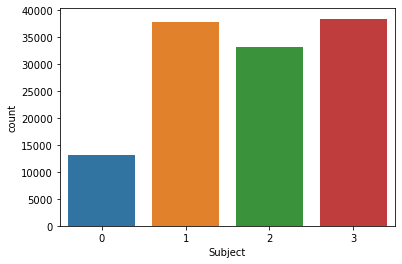

In [11]:
# checking the distribution of outcomes
sns.countplot(x = 'Subject', data = df)

### Splitting for Training and Testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)  # splitting in the ratio 80:20

### Model

In [13]:
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Making Predictions and Checking Accuracy

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
classifier.score(X_test, y_test)

0.8428011753183153

# Predictions are 84.28% accurate.

### Results' Visualization

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1949,  400,  107,  149],
       [ 514, 6276,  203,  608],
       [ 110,  172, 6006,  340],
       [ 216,  638,  395, 6421]], dtype=int64)

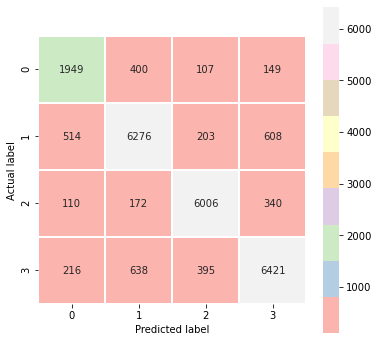

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()